In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import requests
import itertools
from tqdm import tqdm_notebook as tqdm
import re
import collections

amap = lambda *args, **kwargs: array(list(map(*args)), **kwargs)

In [3]:
DAY = 6
headers = {
    'Cookie': ''
}

In [36]:
r = requests.get(f'https://adventofcode.com/2018/day/{DAY}/input', headers=headers)
print(r.text[:100], end='...\n' if len(r.text) > 100 else '\n')
assert r.status_code == 200

main_input = r.text

311, 74
240, 84
54, 241
99, 336
53, 244
269, 353
175, 75
119, 271
267, 301
251, 248
216, 259
327, 50...


In [31]:
lines = main_input.split('\n')
if lines[-1] == '':
    lines = lines[:-1]

In [26]:
lines = """1, 1
1, 6
8, 3
3, 4
5, 5
8, 9""".split('\n')

In [32]:
points = []

for line in lines:
    points.append(amap(int, line.split(', ')))
    
points = array(points, dtype=int)

In [33]:
def distance(a, b, c, d):
    return abs(a - c) + abs(b - d)

In [57]:
directions = list(itertools.product(range(-3, 4), range(-3, 4)))

In [58]:
# for i in range(len(points)):
for i in [26]:
    visited = set()
    bad = set()
    q = collections.deque()
    
    q.append((points[i][0], points[i][1]))
    visited.add((points[i][0], points[i][1]))
    
    ok = True
    
    while len(q) > 0 and ok:
        x, y = q.popleft()
            
        for direction in directions:
            xx = x + direction[0]
            yy = y + direction[1]
            
            if (xx, yy) in visited or (xx, yy) in bad:
                continue
                
            dists = abs(xx - points[:, 0]) + abs(yy - points[:, 1])

            mindist = min(dists)
            if sum(dists == mindist) > 1 or argmin(dists) != i:
                bad.add((xx, yy))
                continue
            
            if mindist > 300:
                bad.add((xx, yy))
                ok = False
                continue
            
            visited.add((xx, yy))
            q.append((xx, yy))
    
    print(i, ok, len(visited))

26 True 5035


In [60]:
Z = zeros((2000, 2000), dtype=int)

for i in tqdm(arange(-1000, 1000)):
    for j in range(-1000, 1000):
        dists = abs(i - points[:, 0]) + abs(j - points[:, 1])
        
        if sum(dists == min(dists)) > 1:
            continue
            
        if argmin(dists) != 26:
            continue
            
        Z[i + 1000, j + 1000] = 1

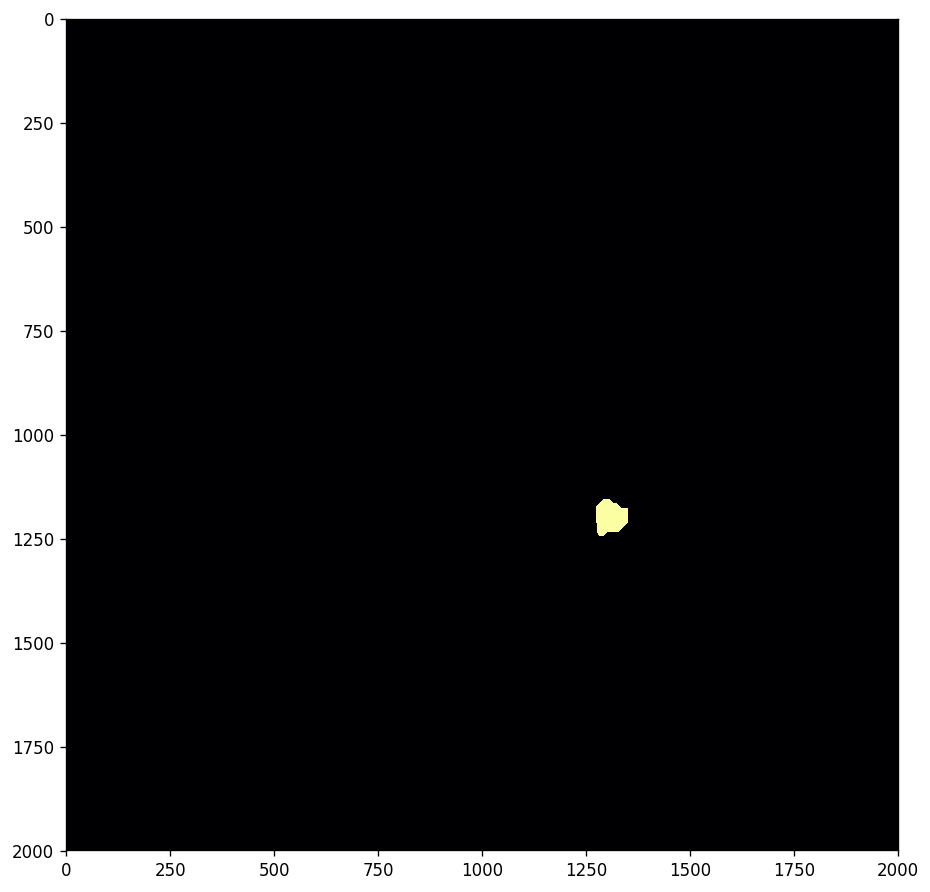

In [62]:
imshow(Z)

In [40]:
c = 0

for i in tqdm(arange(-300, 1000)):
    for j in range(-300, 1000):
        dists = array([distance(i, j, k[0], k[1]) for k in points], dtype=int)
        
        mindist = min(dists)
        if sum(dists) >= 10000:
            continue
            
        c += 1

In [42]:
c

35294

In [48]:

visited = set()
q = collections.deque()

p = (int(mean(points[:, 0])), int(mean(points[:, 1])))

q.append(p)
visited.add(p)

ok = True

while len(q) > 0 and ok:
    x, y = q.popleft()

    for direction in directions:
        xx = x + direction[0]
        yy = y + direction[1]

        if (xx, yy) in visited:
            continue

        dists = array([abs(xx - k[0]) + abs(yy - k[1]) for k in points], dtype=int)
            
#         print(sum(dists))

        if sum(dists) >= 10000:
            continue

        visited.add((xx, yy))
        q.append((xx, yy))

print(ok, len(visited))

True 35294
